# Face13 Single Subject

This notebook inits a single Face13 subject and plots some basic ERP analysis.

In [1]:
import mne
import numpy as np
from pathlib import Path
mne.viz.set_browser_backend('qt')

Using qt as 2D backend.


In [2]:
def single_subject_init(file_list, subject_label, downsample=256):
    out_path = f'{subject_label}_raw.fif'
    if Path(out_path).is_file():
        print('File already exists at: ', out_path)
        return mne.io.read_raw_fif(out_path)
    
    raw = mne.io.read_raw_bdf(f'sourcedata/{file_list[0]}')
    raw.resample(downsample, n_jobs=8)
    for file in file_list[1:]:
        print('Loading file: ', file)
        new_raw = mne.io.read_raw_bdf(f'sourcedata/{file}')
        new_raw.resample(downsample, n_jobs=8)
        mne.io.concatenate_raws([raw, new_raw])

    raw.set_montage('biosemi128')
    raw.save(out_path)
    return raw

In [3]:
all_recordings = ['IC_trn_P01_F_1.bdf','IC_trn_P01_F_2.bdf','IC_trn_P01_F_3.bdf','IC_trn_P01_F_4.bdf',
                  'IC_trn_P01_O_1.bdf','IC_trn_P01_O_2.bdf','IC_trn_P01_O_3.bdf','IC_trn_P01_O_4.bdf']

raw = single_subject_init(all_recordings, 'sub-01')
raw

File already exists at:  sub-01_raw.fif
Opening raw data file sub-01_raw.fif...
    Range : 0 ... 523519 =      0.000 ...  2044.996 secs
Ready.


<Raw | sub-01_raw.fif, 129 x 523520 (2045.0 s), ~181 kB, data not loaded>

In [4]:
event_dict = {
    'boundary': 65791,
    'anim/house/upright/f1': 11,
    'anim/house/upright/f2': 12,
    'anim/house/upright/f3': 13,
    'anim/house/upright/f4': 14,
    'anim/house/upright/f5': 15,
    'anim/house/upright/f6': 16,
    'anim/face/upright/f1': 31,
    'anim/face/upright/f2': 32,
    'anim/face/upright/f3': 33,
    'anim/face/upright/f4': 34,
    'anim/face/upright/f5': 35,
    'anim/face/upright/f6': 36,
    'house/inverted/f1': 21,
    'anim/house/inverted/f2': 22,
    'anim/house/inverted/f3': 23,
    'anim/house/inverted/f4': 24,
    'anim/house/inverted/f5': 25,
    'anim/house/inverted/f6': 26,
    'anim/checker/f1': 51,
    'anim/checker/f2': 52,
    'anim/checker/f3': 53,
    'anim/checker/f4': 54,
    'anim/checker/f5': 55,
    'anim/checker/f6': 56,
    'anim/face/inverted/f1': 41,
    'anim/face/inverted/f2': 42,
    'anim/face/inverted/f3': 43,
    'anim/face/inverted/f4': 44,
    'anim/face/inverted/f5': 45,
    'anim/face/inverted/f6': 46,
    'static/checker/left': 215,
    'press/left': 201,
    'static/checker/right': 216,
    'press/right': 204,
    'static/face/upright': 211,
    'static/face/inverted': 212,
    'static/house/upright': 213,
    'static/house/inverted': 214
}

In [5]:
events = mne.find_events(raw, initial_event=True)

7580 events found
Event IDs: [   11    12    13    14    15    16    21    22    23    24    25    26
    31    32    33    34    35    36    41    42    43    44    45    46
    51    52    53    54    55    56   201   204   211   212   213   214
   215   216 65536 65547 65548 65549 65550 65551 65552 65790 65791]


In [8]:
epochs = mne.Epochs(raw, events, tmin=-1.0, tmax=2.0, event_id=event_dict, preload=True)
del raw
epochs

Not setting metadata
7563 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 7563 events and 769 original time points ...
5 bad epochs dropped


Number of events,7558
Events,anim/checker/f1: 200anim/checker/f2: 200anim/checker/f3: 200anim/checker/f4: 200anim/checker/f5: 200anim/checker/f6: 200anim/face/inverted/f1: 200anim/face/inverted/f2: 200anim/face/inverted/f3: 200anim/face/inverted/f4: 200anim/face/inverted/f5: 200anim/face/inverted/f6: 200anim/face/upright/f1: 199anim/face/upright/f2: 199anim/face/upright/f3: 199anim/face/upright/f4: 199anim/face/upright/f5: 199anim/face/upright/f6: 199anim/house/inverted/f2: 199anim/house/inverted/f3: 199anim/house/inverted/f4: 199anim/house/inverted/f5: 199anim/house/inverted/f6: 199anim/house/upright/f1: 198anim/house/upright/f2: 199anim/house/upright/f3: 199anim/house/upright/f4: 199anim/house/upright/f5: 199anim/house/upright/f6: 199boundary: 0house/inverted/f1: 199press/left: 194press/right: 200static/checker/left: 197static/checker/right: 197static/face/inverted: 197static/face/upright: 198static/house/inverted: 197static/house/upright: 197
Time range,-1.000 – 2.000 sec
Baseline,-1.000 – 0.000 sec


In [9]:
condition_face = 'static/face'
condition_house = 'static/house'
print(epochs[[condition_face, condition_house]])

<Epochs |  789 events (all good), -1 - 2 sec, baseline -1 – 0 sec, ~597.3 MB, data loaded,
 'static/face/upright': 198
 'static/face/inverted': 197
 'static/house/upright': 197
 'static/house/inverted': 197>


In [10]:
faces = epochs[condition_face].average()
houses = epochs[condition_house].average()

combining channels using "mean"
combining channels using "mean"


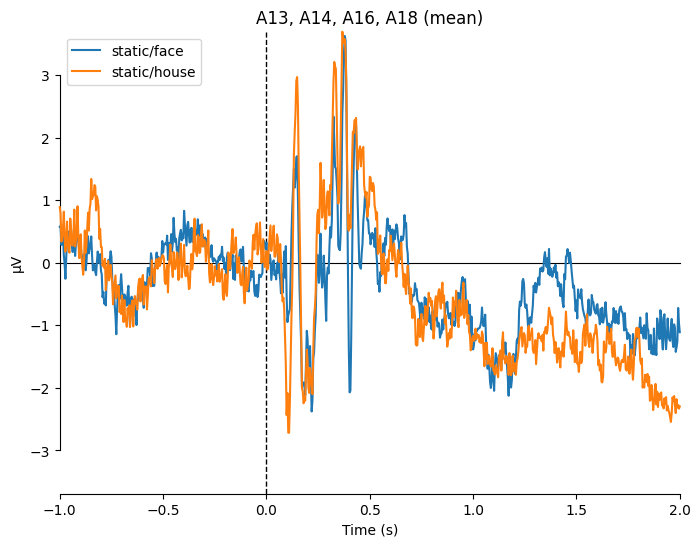

[<Figure size 800x600 with 1 Axes>]

In [12]:
picks = ['A13', 'A14', 'A16', 'A18']
evokeds = {condition_face: faces, condition_house: houses}
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine='mean')

In [16]:
%matplotlib qt
evokeds = dict(condition_face=list(epochs[condition_face].iter_evoked()),
               condition_house=list(epochs[condition_house].iter_evoked()))
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=picks)

combining channels using "mean"
combining channels using "mean"


[<Figure size 800x600 with 1 Axes>]